# Loading the data 

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
# store feature matrix in x
X = iris.data
# store response vector in y
y = iris.target

In [13]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Scikit-learn 4 step modeling pattern

step 1 : import the class you plan to use 


In [15]:
from sklearn.neighbors import KNeighborsClassifier

step 2 : "Instantiate" the "Estimator"
    *"Estimator" is the scikit-learn's term for model
    * "Instantiate" means "make an instance of"

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
#n_neighbors is the tuning parameter or hyper parameters
# all other parameters not specified are set to their defaults

Step 3 : #fit the model with data - model training
         * model is learning the realtionship between X and y
         * occurs in place


In [24]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

step 4 : 
Predict the response for a new observation
New observations are called "out of sample" data
uses the information it learned during the model training process

In [28]:
knn.predict([[3,5,4,2]])

### Returns a NumPy Array


array([2])

In [29]:
### Can predict for multiple observations at once
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

# Using a different value for K

In [30]:
# instantiate the model ( using k value = 5) --- model tunning
knn = KNeighborsClassifier(n_neighbors=5)
# fitting the model with data
knn.fit(X,y)
## predicting the value for new observations
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([1, 1])

# Using a different classification model

In [32]:
## import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model ( using the default parameters)
logreg = LogisticRegression()
# fit the model with the data
logreg.fit(X,y)
# predict the response for the new observations
X_new = [[3,5,4,2],[5,4,3,2]]
logreg.predict(X_new)

C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

Agenda

How do I choose which model to use for my supervised learning task?
How do I choose the best tuning parameters for that model?
How do I estimate the likely performance of my model on out-of-sample data?
Review

Classification task:

Predicting the species of an unknown iris
Used three classification models: KNN (K=1), KNN (K=5), logistic regression
Need a way to choose between the models

# Evaluation procedure 


#1: Train and test on the entire dataset
#2: Test the model on the same dataset and evaluate how well we didi by comparing the predicted response values with the true response values

In [33]:
# read the dataset
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()
X = iris.data
y = iris.target

# KNN (k=5)

In [38]:
#importing the class 
from sklearn.neighbors import KNeighborsClassifier
#instanciate the model with knn(n_neighbors = 1)
knn = KNeighborsClassifier(n_neighbors=5)
## fitting the model with the data
knn.fit(X,y)
## predicting the model on the features 
y_pred = knn.predict(X)
## check the length of the prediction values
print("Length of predicted value:",y_pred)
## model evaluation using accuracy score ( actual value , predicted values)
## importing the class 
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("accuracy score : ",metrics.accuracy_score(y,y_pred))

Length of predicted value: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy score :  0.9666666666666667


# Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression
# create instance of the model
logreg = LogisticRegression()
# fitting the model with data
logreg.fit(X,y)
# predicting the value
y_pred = logreg.predict(X)
# check accuracy score 
print("Accuracy Score : ",metrics.accuracy_score(y,y_pred))

Accuracy Score :  0.9733333333333334


C:\Users\Anonymous\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN (k=1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print("accuracy score",metrics.accuracy_score(y,y_pred))
## accuracy score is 1.0 means 100% accracy because we are using same dataset for training and testing 

accuracy score 1.0


# problems with training and testing on the same data

In [41]:
#Goal is to estimate likely performance of a model on out-of-sample data
#But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
#Unnecessarily complex models overfit the training data

# Evaluation procedure #2 : Train/test split

In [42]:
 from sklearn.model_selection import train_test_split

In [43]:
## split the data in to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)
## if we don't use random state & if we run this train_test_split method 4 times it will differently split data every time

In [44]:
# logistic regression
logreg = LogisticRegression()
# fit model
logreg.fit(X_train,y_train)
# predicting response variable
y_pred = logreg.predict(X_test)
# calcualte accuracy score 
print("Accuracy score : ",metrics.accuracy_score(y_test,y_pred))

Accuracy score :  0.9666666666666667


In [45]:
## KNN ( k = 1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
# calcualte accuracy score 
print("accuracy score : ",metrics.accuracy_score(y_test,y_pred))

accuracy score :  0.95


In [46]:
## knn(k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
## calculate accuracy score 
print("Accuracy score :",metrics.accuracy_score(y_test,y_pred))

Accuracy score : 0.9666666666666667


# Can we locate an even better value for K ?

In [50]:
k_values = range(1,26)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))


In [53]:
scores.index(max(scores))
# index of maximum element in a list

5

In [54]:
scores

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

In [56]:
import pandas as pd
pd.Series(scores).idxmax()
# getting index of a maximum element in Series

5

In [57]:
import numpy as np
np.array(scores).argmax()
# getting index of a maximum element in a array

5

# plotting the realtionship between K_values and Accuracy

In [58]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Testing Accuracy')

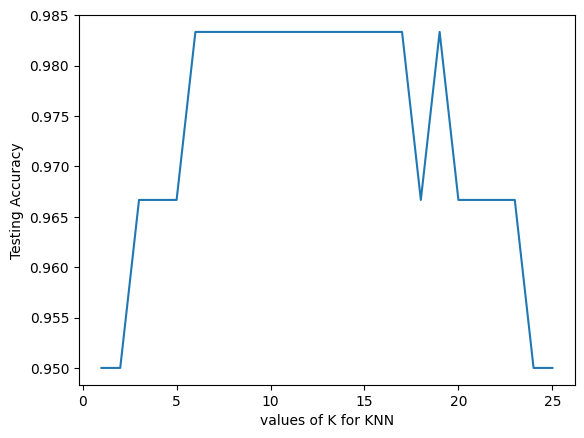

In [59]:
plt.plot(k_values,scores)
plt.xlabel("values of K for KNN")
plt.ylabel("Testing Accuracy")


# Downsides of train/test split

In [ ]:
# Provides a high variance estimate of out-of-sample accuracy
# K-fold cross validations overcomes this limitations
# But train test split is still useful for it's flexibility and speed
 